<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/API_Example_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#APIs and API wrappers

##API: Application Programming Interface presents a set of rules shaping a service*:

1.   format of data to be read (most probably .json, but sometimes .csv) 
2.   commands used to access a computing service
3.   what data this service can return in the response. ​

"The API acts as a layer between your application and external service. You do not need to know the internal structure and features of the service, you just send a certain simple command and receive data in a predetermined format" [1]

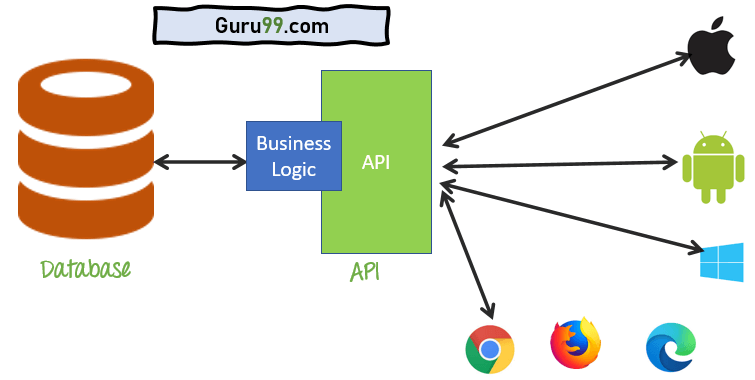​

[Image Source](https://www.guru99.com/what-is-api.html)


A wrapper makes the use of the API's even simpler. In the first example, we will use a Reddit API to collect data about a subreddit called "[Ex_Foster](https://www.reddit.com/r/Ex_Foster/)."

First, we will install a python wrapper for one of the Reddit API's created by Pushhift - [PSAW](https:pypi.org/project/psaw/). 

[1] [https://rapidapi.com/blog/how-to-use-an-api-with-python/](https://rapidapi.com/blog/how-to-use-an-api-with-python/)

* computing service

In [1]:
#first, let's install the wrapper PSAW
#using !, we can introduce commands that allow us to install packages etc.
!pip install psaw

In [2]:
import pandas as pd
#we will need datetime in order to specify the timeline we need to collect the data
import datetime as dt

#now we import the wrapper in order to use the API
from psaw import PushshiftAPI

api = PushshiftAPI()

In [3]:
#mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#this function will allow us to find the last day of each month
#for example, there are 31 days in January, but 28 this February
def last_day_of_month(any_day):
    # this will never fail
    # get close to the end of the month for any day, and add 4 days 'over'
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)
    # subtract the number of remaining 'overage' days to get last day of current month, or said programattically said, the previous day of the first of next month
    return next_month - datetime.timedelta(days=next_month.day)

In [ ]:
#let's read the comments between 2019 and 2021
#including all the months between Janury and December
subreddit_name = input('Enter the name of the subreddit ')
start_year = int(input('Enter the start year '))
end_year= int(input('Enter the end year '))
start_month = int(input('Enter the first month '))
end_month = int(input('Enter the last month '))

In [ ]:
import datetime
subredditlist = [subreddit_name]
for reddit in subredditlist:
    for y in range(int(start_year),int(end_year)+1):
      for i in range(int(start_month),int(end_month)+1):
          file_name= str(reddit)+"_"+str(y)+"_"+str(i)+".json"
          print("starting with the month "+str(i))
          print("for subreddit..."+str(reddit))
          print("setting start epoch...")
          start_epoch=int(dt.datetime(y, i, 1).timestamp())
          print("setting end epoch...")
          last_day = last_day_of_month(datetime.date(y, i, 1))
          print("the last day of the month is...")
          print(last_day.day)
          last_day = int(last_day.day)
          end_epoch = int(dt.datetime(y,i,last_day).timestamp())
          print("setting up the generator...")
          gen = api.search_comments(after=start_epoch, before=end_epoch,subreddit=reddit)
          print("setting up the dataframe...")
          df = pd.DataFrame([obj.d_ for obj in gen])
          print("The number of comments for year "+ str(y)+" and month "+str(i)+" is "+str(len(df.index)))
          df.to_json(file_name)

starting with the month 1
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2018 and month 1 is 0
starting with the month 2
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
28
setting up the generator...
setting up the dataframe...
The number of comments for year 2018 and month 2 is 0
starting with the month 3
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2018 and month 3 is 0
starting with the month 4
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for year 2018 and month 4 is 0
starting with the month 5
for subred

Now, suppose I wanted to only collect data between two dates,
say January 1st, 2021 and January 2nd, 2021...here's how I would do this

In [7]:
#this is the filename I will use to stor the dataset
file_name= "Ex_Foster_Early_Jan.json"
#creating the start epoch, the first date to start the collection process
#we want to start with January 1st 2020
print("setting start epoch...")
start_epoch=int(dt.datetime(2021,1,1).timestamp())
print(start_epoch)
#now setting the end epoch to be January 5th
print("setting end epoch...")
end_epoch = int(dt.datetime(2021,1,2).timestamp())
print(end_epoch)
print("setting up the generator...")
#use the API wrapper to generate the results
gen = api.search_comments(after=start_epoch, before=end_epoch,subreddit='wallstreetbets')
print("setting up the dataframe...")
#now store the results in a data frame
df = pd.DataFrame([obj.d_ for obj in gen])
#finally, store the dataframe as json file
#use the filename I created earlier
df.to_json(file_name)

setting start epoch...
1609459200
setting end epoch...
1609545600
setting up the generator...
setting up the dataframe...


We could be even more granular than that...suppose we wanted to find the data between not only two dates, but specific times. Shall we say a specific time on day 1 and another specific time on day 2. 

The [datetime python function](https://docs.python.org/3/library/datetime.html) comes to the rescue again! 

Below is a example setting the date and time to January 5th, 2021 at 6 pm (GMT). Note that the output is then provided in [unix epochs](https://en.wikipedia.org/wiki/Unix_time). This is a [unix epoch converter](https://www.unixtimestamp.com/index.php) if you want to check your work.

In [10]:
time = dt.datetime(2021,1,5,18,0)
#let's see what the time looks like
print(time)
#now as a unix epoch
time = int(dt.datetime(2021,1,5,18,0).timestamp())
print(time)

2021-01-05 18:00:00
1609869600


In [ ]:
#now I want to get the folder name without having to write the complete address of the current working directory
import os
#get current working directory (CWD)
cwd = os.getcwd()
print(cwd)

/content


In [ ]:
# The glob module finds all the pathnames matching a specified pattern 
# https://docs.python.org/3/library/glob.html
# We want to find all the files that start with Ex_Foster AND end with .json
import glob
#create an empty list to add things to it
contents = []
#json_dir_name becomes the current working directory
json_dir_name = cwd
# Again, we want to find all the files that start with [Ex_Foster AND end with .json]
json_pattern = os.path.join(json_dir_name, 'Ex_Foster*.json')
file_list = glob.glob(json_pattern)
for file in file_list:
    contents.append(file)

In [ ]:
#let's take a look at contents
contents

['/content/Ex_Foster_2020_9.json',
 '/content/Ex_Foster_2019_10.json',
 '/content/Ex_Foster_2020_10.json',
 '/content/Ex_Foster_2020_11.json',
 '/content/Ex_Foster_2018_4.json',
 '/content/Ex_Foster_2021_6.json',
 '/content/Ex_Foster_2019_2.json',
 '/content/Ex_Foster_2018_1.json',
 '/content/Ex_Foster_2019_8.json',
 '/content/Ex_Foster_2019_11.json',
 '/content/Ex_Foster_2021_3.json',
 '/content/Ex_Foster_2018_5.json',
 '/content/Ex_Foster_2021_5.json',
 '/content/Ex_Foster_2021_2.json',
 '/content/Ex_Foster_2020_5.json',
 '/content/Ex_Foster_2019_9.json',
 '/content/Ex_Foster_2019_12.json',
 '/content/Ex_Foster_2020_3.json',
 '/content/Ex_Foster_2020_6.json',
 '/content/Ex_Foster_2018_8.json',
 '/content/Ex_Foster_2018_2.json',
 '/content/Ex_Foster_2021_10.json',
 '/content/Ex_Foster_2018_11.json',
 '/content/Ex_Foster_2020_12.json',
 '/content/Ex_Foster_2021_8.json',
 '/content/Ex_Foster_2020_8.json',
 '/content/Ex_Foster_2018_3.json',
 '/content/Ex_Foster_2021_1.json',
 '/content/E

In [ ]:
#import json
#collecting all the json files into one pandas dataframe
df = pd.DataFrame()
for file in contents:
    print('reading...')
    print(file)
    tmp_frame = pd.read_json(file)
    #appending the new pandas dataframe to the earlier ones
    #remember how we appended the pandas DataFrame to itself 
    #in https://github.com/tawfiqam/MI564/blob/main/Pandas_Introduction.ipynb
    df = df.append(tmp_frame, ignore_index=True)

reading...
/content/Ex_Foster_2020_9.json
reading...
/content/Ex_Foster_2019_10.json
reading...
/content/Ex_Foster_2020_10.json
reading...
/content/Ex_Foster_2020_11.json
reading...
/content/Ex_Foster_2018_4.json
reading...
/content/Ex_Foster_2021_6.json
reading...
/content/Ex_Foster_2019_2.json
reading...
/content/Ex_Foster_2018_1.json
reading...
/content/Ex_Foster_2019_8.json
reading...
/content/Ex_Foster_2019_11.json
reading...
/content/Ex_Foster_2021_3.json
reading...
/content/Ex_Foster_2018_5.json
reading...
/content/Ex_Foster_2021_5.json
reading...
/content/Ex_Foster_2021_2.json
reading...
/content/Ex_Foster_2020_5.json
reading...
/content/Ex_Foster_2019_9.json
reading...
/content/Ex_Foster_2019_12.json
reading...
/content/Ex_Foster_2020_3.json
reading...
/content/Ex_Foster_2020_6.json
reading...
/content/Ex_Foster_2018_8.json
reading...
/content/Ex_Foster_2018_2.json
reading...
/content/Ex_Foster_2021_10.json
reading...
/content/Ex_Foster_2018_11.json
reading...
/content/Ex_Fost

In [ ]:
len(df)

4990

In [ ]:
#Now let's check the shape of the DataFrame
df.shape

(4990, 41)

In [ ]:
df.head()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,body,collapsed_because_crowd_control,comment_type,created_utc,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,created,edited,distinguished,steward_reports,author_cakeday,updated_utc
0,[],NaN,L2F2020,None,NaN,[],None,None,None,text,t2_89seva1u,0.0,0.0,[],&gt; I can list you tens of forms of punishmen...,NaN,NaN,1601332732,{},g7045al,False,t3_j11x3y,False,True,t1_g6x1fn2,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...,1601338324,1,True,False,Ex_Foster,t5_ykjzi,NaN,0.0,[],1601332732,NaN,None,NaN,NaN,NaN
1,[],NaN,iOnlyDo69,None,NaN,[],None,None,None,text,t2_6lgrodm1,0.0,0.0,[],I just read this and kinda freaked out because...,NaN,NaN,1601327106,{},g6ztx7m,False,t3_j11x3y,False,True,t1_g6x1fn2,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...,1601332891,1,True,False,Ex_Foster,t5_ykjzi,NaN,0.0,[],1601327106,1.601327e+09,None,NaN,NaN,NaN
2,[],NaN,threadshredder,None,NaN,[],None,None,None,text,t2_134mw6,0.0,0.0,[],I wouldn’t stress the weed too much but defini...,NaN,NaN,1601323682,{},g6zn31t,False,t3_ippo9j,False,True,t1_g5dkptf,/r/Ex_Foster/comments/ippo9j/i_am_a_doster_par...,1601329051,1,True,False,Ex_Foster,t5_ykjzi,NaN,0.0,[],1601323682,NaN,None,NaN,NaN,NaN
3,[],NaN,RapidRadRunner,#dadada,NaN,"[{'e': 'text', 't': ' foster parent'}]",eb0c664c-5f0b-11e9-8162-0e2688cdad6c,foster parent,dark,richtext,t2_2j2z8y,0.0,0.0,[],I'm so sorry! This is absolutely heartbreaking!,NaN,NaN,1601296140,{},g6y1wri,False,t3_j11x3y,False,True,t1_g6x1fn2,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...,1601296151,1,True,False,Ex_Foster,t5_ykjzi,NaN,0.0,[],1601296140,NaN,None,NaN,NaN,NaN
4,[],NaN,SeaCow7829,None,NaN,[],None,None,None,text,t2_84ukck26,0.0,0.0,[],I just got to a new placement (from group home...,NaN,NaN,1601261811,{},g6x1fn2,True,t3_j11x3y,False,True,t1_g6wsmny,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...,1601264720,1,True,False,Ex_Foster,t5_ykjzi,NaN,0.0,[],1601261811,NaN,None,NaN,NaN,NaN


In [ ]:
#cleaning the columns
new_columns = ['author','created_utc','id','parent_id','link_id','body','score','permalink']

In [ ]:
df = df[new_columns]

In [ ]:
#let's check
df.head()

,author,created_utc,id,parent_id,link_id,body,score,permalink
0,L2F2020,1601332732,g7045al,t1_g6x1fn2,t3_j11x3y,&gt; I can list you tens of forms of punishmen...,1,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...
1,iOnlyDo69,1601327106,g6ztx7m,t1_g6x1fn2,t3_j11x3y,I just read this and kinda freaked out because...,1,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...
2,threadshredder,1601323682,g6zn31t,t1_g5dkptf,t3_ippo9j,I wouldn’t stress the weed too much but defini...,1,/r/Ex_Foster/comments/ippo9j/i_am_a_doster_par...
3,RapidRadRunner,1601296140,g6y1wri,t1_g6x1fn2,t3_j11x3y,I'm so sorry! This is absolutely heartbreaking!,1,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...
4,SeaCow7829,1601261811,g6x1fn2,t1_g6wsmny,t3_j11x3y,I just got to a new placement (from group home...,1,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...


In [ ]:
#shapre after cleaning the columns
df.shape

(4990, 8)

The created_utc column uses unix time. Unix time is a system for describing a point in time.  It is the number of seconds that have elapsed since the Unix epoch, minus leap seconds; the Unix epoch is 00:00:00 UTC on 1 January 1970 

source: https://en.wikipedia.org/wiki/Unix_time

No worries! Pandas has your back. The function to_datetime changes unix time 
to YYYY-MM-DD HH:MM:SS


In [ ]:
df['created_utc'] = pd.to_datetime(df['created_utc'],unit='s')

In [ ]:
df.head()

,author,created_utc,id,parent_id,link_id,body,score,permalink
0,L2F2020,2020-09-28 22:38:52,g7045al,t1_g6x1fn2,t3_j11x3y,&gt; I can list you tens of forms of punishmen...,1,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...
1,iOnlyDo69,2020-09-28 21:05:06,g6ztx7m,t1_g6x1fn2,t3_j11x3y,I just read this and kinda freaked out because...,1,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...
2,threadshredder,2020-09-28 20:08:02,g6zn31t,t1_g5dkptf,t3_ippo9j,I wouldn’t stress the weed too much but defini...,1,/r/Ex_Foster/comments/ippo9j/i_am_a_doster_par...
3,RapidRadRunner,2020-09-28 12:29:00,g6y1wri,t1_g6x1fn2,t3_j11x3y,I'm so sorry! This is absolutely heartbreaking!,1,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...
4,SeaCow7829,2020-09-28 02:56:51,g6x1fn2,t1_g6wsmny,t3_j11x3y,I just got to a new placement (from group home...,1,/r/Ex_Foster/comments/j11x3y/anyone_else_misse...


Finally, save the aggregated df to json file...

In [ ]:
df.to_json('Ex_Foster_Complete.json')

In [ ]:
#In order to plot the data in DataFrames, we first have to include the requisite python libraries.
import matplotlib.pyplot as plt
#Then let's set the size of the visualizations
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

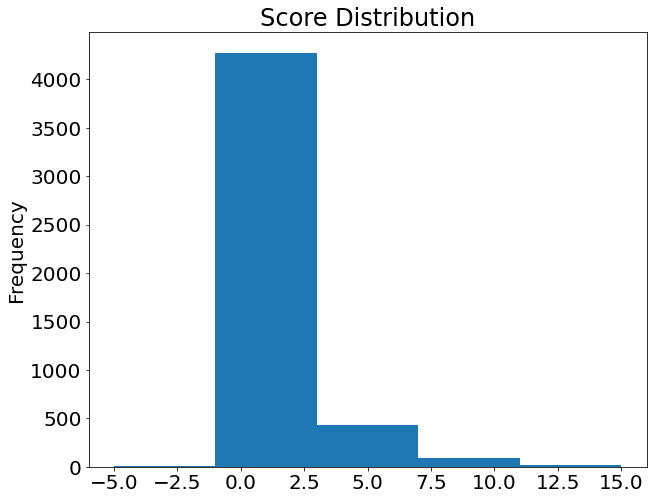

In [ ]:
df['score'].plot(kind='hist',title='Score Distribution', bins=5);

In [ ]:
#Now let's try describe
#Again....check the Introduction to Pandas 
df['score'].describe()

count    4823.000000
mean        1.501555
std         1.451107
min        -5.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: score, dtype: float64

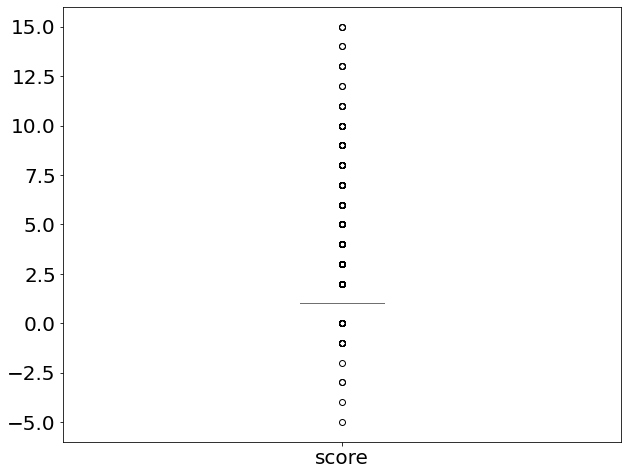

In [ ]:
df['score'].plot(kind='box')

So, there are comments represent as an outlier (let's say >12). Let's sample what some of these comments are talking about...


In [ ]:
df[df['score']>12].body

1247    I am a parent and so I'll delete this and just...
2014    I’m not sure if this is controversial or not, ...
2475    The most impactful thing my foster mom did was...
2653    You weren’t worthless then and you aren’t wort...
3518    I "bid" my time at 16 and a half for over a ye...
3527    She has been there a month - I think it’s too ...
3583    Not a foster youth but case manager. I have a ...
3584    Look heavily into your university’s resources....
4354    That isn't even the worst of it. They actually...
Name: body, dtype: object

woops...forgot that I need to show the complete text

In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
df[df['score']<5].body

0       Thank you for having the courage to tell us about this. I am truly sorry, and I hope that she always stays with you in your heart. You have already been through a lot in your life, and to lose your companion just makes it all the harder for you to cope with it all. We all love you and your dog here, and we wish you the best in processing your loss. \n\nIf you ever need someone to talk to, please feel free to message me- I'm more online than I should be nowadays, so I definitely won't miss your message.\n\n&lt;3                                                                                                                                                                                              
1       I am so sorry for your loss. I am so glad the two of you got to love each other for 13 years. It hurts because you loved her so much but the ability to love so deeply also means you are strong. Take it one day at a time.                                                         

In [ ]:
#testing on a different Reddit dataframe which I included before
#this is the r/wallstreetbets subreddit
#I collected this DataFrame before, and will be reading it now
wallstreetbets = pd.read_json('wallstreetsub.json')
#this file can be found here: https://drive.google.com/file/d/1a4-A6sLEzrDeIw0m8fMQT7mOtr7oAXq6/view?usp=sharing

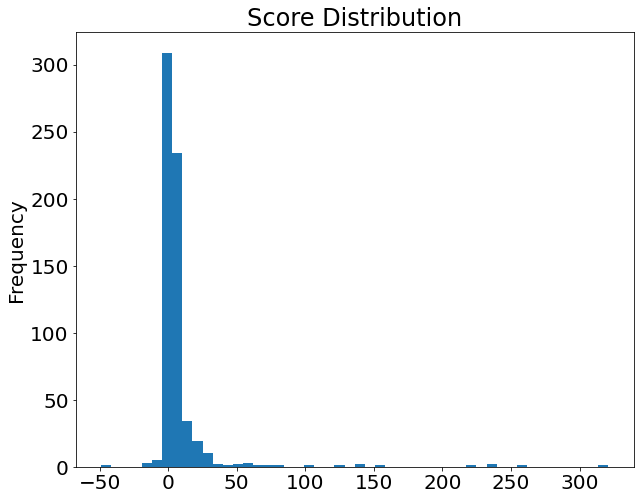

In [ ]:
wallstreetbets['score'].plot(kind='hist',title='Score Distribution', bins=50);

In [ ]:
#Now let's try describe
#Again....check the Introduction to Pandas 
wallstreetbets['score'].describe()

count    636.000000
mean     7.982704  
std      26.384283 
min     -49.000000 
25%      1.000000  
50%      2.500000  
75%      6.000000  
max      321.000000
Name: score, dtype: float64

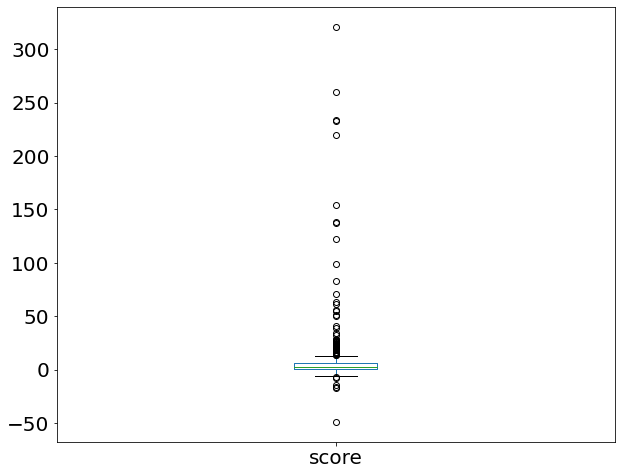

In [ ]:
wallstreetbets['score'].plot(kind='box')

So, there are comments represent as an outlier (let's say >300). Let's sample what some of these comments are talking about...


In [ ]:
wallstreetbets[wallstreetbets['score']>300].body

305    should I sell my 15 shares of TSLA - to go all in on GME ??!!!!??!
Name: body, dtype: object

In [ ]:
#now let's check the lower scores
wallstreetbets[wallstreetbets['score']<50].body

0      How can retards manipulate the stock market?                                                                                                                                                                                                                                     
1      Maybe if her boyfriend is gay and she wants to look like a penis.                                                                                                                                                                                                                
2      Nein                                                                                                                                                                                                                                                                             
3      It might go up this year considering they were the only  tech company on the planet to lose value last year. Garbage                                  